In [8]:
import pandas as pd

and asked solvers to use three months of clinical trial information to predict disease future progression in months 3–12. The progression of the disease was assessed by the slope of change in ALSFRS values, which assumes a linear disease progression.

In [16]:
from pathlib import Path
data_path = Path('../data/data.csv')
proact_raw = pd.read_csv(data_path)
# keep only those time >= 0
negative_time_ids = proact_raw.loc[proact_raw['time'] < 0]['ID'].values
proact_filterd = proact_raw.loc[~proact_raw.ID.isin(negative_time_ids),].copy()
proact_filterd.describe()


,ID,Age,Onset.time,Onset.Bulbar,Onset.Limb,Sex.Male,time,Next.FRS,Next.visit.Time,ALSFRS_Total,...,Bilirubin,Chloride,Hematocrit,Hemoglobin,Potassium,Protein,Glucose,Calcium,Sodium,Platelets
count,22019.000000,22019.000000,22019.000000,22019.000000,22019.000000,22019.000000,22019.000000,22019.000000,22019.000000,22019.000000,...,22019.000000,22019.000000,22019.000000,22019.000000,22019.000000,22019.000000,22019.000000,22019.000000,22019.000000,22019.000000
mean,501169.432853,54.664154,-725.985013,0.564467,-0.591898,0.265453,186.914892,165.829647,186.040556,26.861710,...,11.487510,102.818779,38.657101,144.836844,4.193242,72.424324,5.620115,2.332696,140.163409,242.335074
std,289027.112847,11.752835,480.803323,0.825474,0.806031,0.964146,154.816978,340.874376,333.315441,7.277932,...,6.076822,3.665277,13.641456,12.666581,0.341040,4.698684,1.604036,0.115412,2.789193,61.849207
min,329.000000,20.000000,-8741.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,65.000000,0.287000,6.204000,2.700000,40.000000,0.000000,0.586325,119.000000,4.000000
25%,248745.000000,46.000000,-961.000000,1.000000,-1.000000,-1.000000,61.000000,23.000000,32.000000,22.000000,...,7.000000,101.000000,39.600000,137.000000,4.000000,70.000000,4.800000,2.245500,138.000000,201.000000
50%,501419.000000,56.000000,-595.000000,1.000000,-1.000000,1.000000,144.000000,29.000000,56.000000,28.000000,...,10.262400,103.000000,42.900000,145.000000,4.100000,72.000000,5.300000,2.320350,140.000000,236.000000
75%,749603.000000,64.000000,-377.000000,1.000000,-1.000000,1.000000,288.000000,35.000000,67.000000,32.000000,...,15.393600,105.000000,45.400000,153.000000,4.400000,75.000000,5.900000,2.400000,142.000000,276.000000
max,999880.000000,84.000000,0.000000,1.000000,1.000000,1.000000,623.000000,999.000000,999.000000,40.000000,...,153.936000,118.000000,81.000000,280.000000,13.000000,96.000000,28.000000,2.950000,176.000000,866.000000


In [17]:
proact_raw.describe()

,ID,Age,Onset.time,Onset.Bulbar,Onset.Limb,Sex.Male,time,Next.FRS,Next.visit.Time,ALSFRS_Total,...,Bilirubin,Chloride,Hematocrit,Hemoglobin,Potassium,Protein,Glucose,Calcium,Sodium,Platelets
count,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000,...,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000,22089.000000
mean,501834.093259,54.652678,-726.958079,0.565304,-0.592648,0.266332,186.661279,165.990086,186.197927,26.844085,...,11.500121,102.811024,38.681452,144.871314,4.193322,72.425108,5.620534,2.332697,140.169048,242.511522
std,289211.103048,11.751766,481.111851,0.824901,0.805480,0.963903,154.719267,341.057911,333.491912,7.283408,...,6.077683,3.672409,13.627651,12.671118,0.341282,4.702865,1.602771,0.115433,2.790542,62.093461
min,329.000000,20.000000,-8741.000000,-1.000000,-1.000000,-1.000000,-12.000000,0.000000,2.000000,0.000000,...,0.000000,65.000000,0.287000,6.204000,2.700000,40.000000,0.000000,0.586325,119.000000,4.000000
25%,251579.000000,46.000000,-963.000000,1.000000,-1.000000,-1.000000,61.000000,23.000000,32.000000,22.000000,...,7.000000,101.000000,39.600000,137.000000,4.000000,70.000000,4.800000,2.245500,138.000000,201.000000
50%,501995.000000,56.000000,-597.000000,1.000000,-1.000000,1.000000,143.000000,29.000000,56.000000,28.000000,...,10.262400,103.000000,42.900000,145.000000,4.100000,72.000000,5.300000,2.320350,140.000000,236.000000
75%,750148.000000,64.000000,-378.000000,1.000000,-1.000000,1.000000,288.000000,35.000000,67.000000,32.000000,...,15.393600,105.000000,45.400000,153.000000,4.400000,75.000000,5.900000,2.400000,142.000000,276.000000
max,999880.000000,84.000000,0.000000,1.000000,1.000000,1.000000,623.000000,999.000000,999.000000,40.000000,...,153.936000,118.000000,81.000000,280.000000,13.000000,96.000000,28.000000,2.950000,176.000000,866.000000


In [18]:
proact_filterd.set_index('ID', inplace=True)
proact_filterd.sort_values(['ID','time'], inplace=True)
proact_filterd.head(10)

,Age,Onset.time,Onset.Bulbar,Onset.Limb,Sex.Male,time,Next.FRS,Next.visit.Time,ALSFRS_Total,Q1_Speech,...,Bilirubin,Chloride,Hematocrit,Hemoglobin,Potassium,Protein,Glucose,Calcium,Sodium,Platelets
ID,,,,,,,,,,,,,,,,,,,,,
329,38,-1706,1,-1,-1,0,30,42,27,4,...,0.0000,105.0,41.0,130.0,4.0,70.0,4.9395,2.24550,138.0,273.0
329,38,-1706,1,-1,-1,42,30,30,30,4,...,0.0000,104.0,38.0,120.0,4.0,70.0,5.9385,2.24550,137.0,239.0
329,38,-1706,1,-1,-1,72,27,63,30,4,...,17.1040,98.0,38.0,120.0,3.0,70.0,5.5500,2.24550,141.0,161.0
329,38,-1706,1,-1,-1,135,25,54,27,4,...,17.1040,103.0,38.0,120.0,4.0,70.0,5.2170,2.24550,138.0,31.0
329,38,-1706,1,-1,-1,189,26,58,25,4,...,0.0000,100.0,36.0,120.0,4.0,70.0,4.9950,2.24550,142.0,320.0
329,38,-1706,1,-1,-1,247,25,27,26,4,...,17.1040,105.0,38.0,120.0,4.0,70.0,5.6055,2.24550,137.0,347.0
329,38,-1706,1,-1,-1,274,999,999,25,4,...,17.1040,106.0,35.0,120.0,4.0,80.0,6.8820,2.49500,140.0,293.0
533,65,-1023,-1,1,-1,0,999,999,30,1,...,5.1312,108.0,40.7,143.0,4.5,70.0,7.4370,2.22055,143.0,169.0
649,48,-341,-1,1,-1,0,35,32,36,3,...,6.8416,105.0,39.8,132.0,4.2,73.0,4.8285,2.17065,140.0,265.0


In [19]:
# apply delta t per ID
proact_filterd = proact_filterd.reset_index()
proact_filterd['dt'] = proact_filterd.groupby(['ID']).diff()['time']
proact_filterd.set_index('ID', inplace=True)
proact_filterd.sort_values(['ID','time'], inplace=True)
proact_filterd.head()[['time','dt']]

,time,dt
ID,,
329,0,NaN
329,42,42.0
329,72,30.0
329,135,63.0
329,189,54.0


<AxesSubplot:>

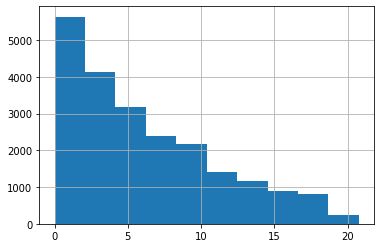

In [20]:
proact_filterd['time_months'] = proact_filterd['time'] / 30
proact_filterd['time_months'].hist()

In [21]:
proact_filterd.head()

,Age,Onset.time,Onset.Bulbar,Onset.Limb,Sex.Male,time,Next.FRS,Next.visit.Time,ALSFRS_Total,Q1_Speech,...,Hematocrit,Hemoglobin,Potassium,Protein,Glucose,Calcium,Sodium,Platelets,dt,time_months
ID,,,,,,,,,,,,,,,,,,,,,
329,38,-1706,1,-1,-1,0,30,42,27,4,...,41.0,130.0,4.0,70.0,4.9395,2.2455,138.0,273.0,NaN,0.0
329,38,-1706,1,-1,-1,42,30,30,30,4,...,38.0,120.0,4.0,70.0,5.9385,2.2455,137.0,239.0,42.0,1.4
329,38,-1706,1,-1,-1,72,27,63,30,4,...,38.0,120.0,3.0,70.0,5.5500,2.2455,141.0,161.0,30.0,2.4
329,38,-1706,1,-1,-1,135,25,54,27,4,...,38.0,120.0,4.0,70.0,5.2170,2.2455,138.0,31.0,63.0,4.5
329,38,-1706,1,-1,-1,189,26,58,25,4,...,36.0,120.0,4.0,70.0,4.9950,2.2455,142.0,320.0,54.0,6.3
